In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6
import warnings
warnings.filterwarnings('ignore')

In [41]:
heart_data=pd.read_csv('heart.csv')


In [42]:
heart_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [43]:
heart_data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [44]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [45]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


<AxesSubplot:xlabel='output', ylabel='count'>

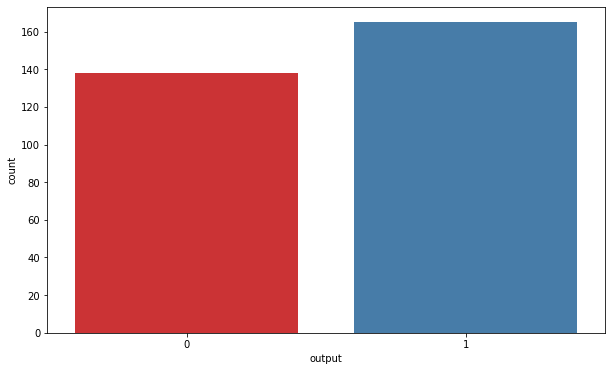

In [46]:
sns.countplot('output',data=heart_data,palette='Set1')

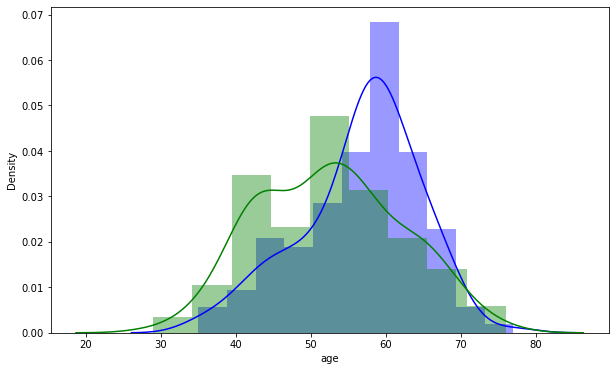

In [47]:
sns.distplot(heart_data[heart_data['output'] == 0]["age"], color='blue',kde=True) 
sns.distplot(heart_data[heart_data['output'] == 1]["age"], color='green',kde=True)
plt.show()

<AxesSubplot:xlabel='sex', ylabel='restecg'>

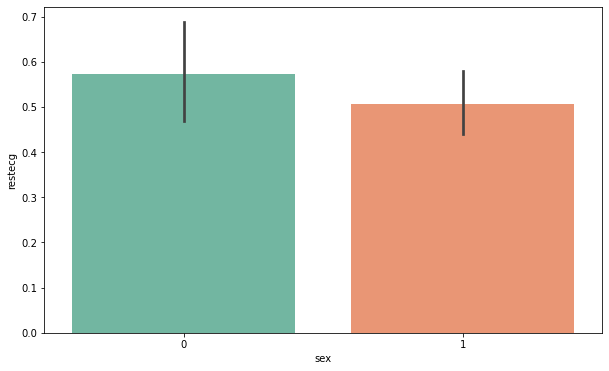

In [48]:
sns.barplot(y='restecg',x='sex',data=heart_data,palette='Set2')

<AxesSubplot:xlabel='sex', ylabel='chol'>

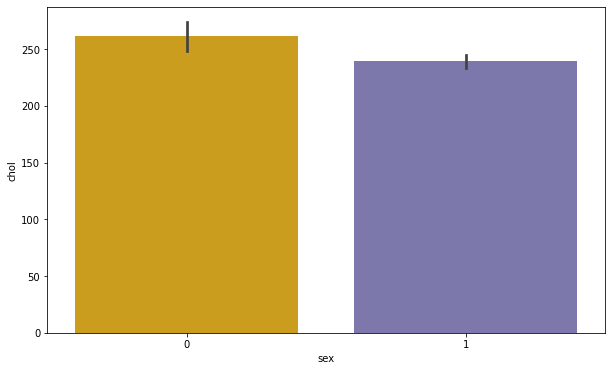

In [74]:
sns.barplot(x='sex',y='chol',data=heart_data,palette='Dark2_r')

<AxesSubplot:xlabel='output', ylabel='trtbps'>

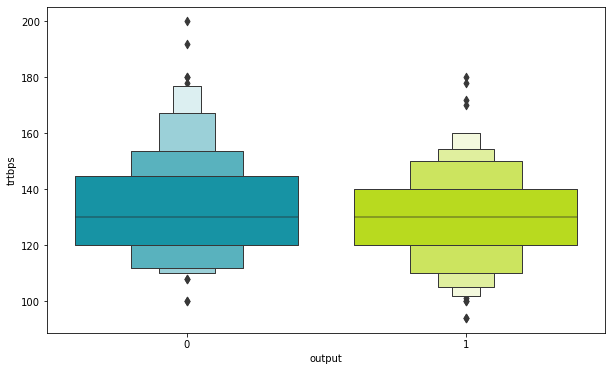

In [84]:
sns.boxenplot(x='output',y='trtbps',data=heart_data,palette='nipy_spectral')

In [85]:
heart_data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [88]:
x=heart_data[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall']]
y=heart_data['output']

In [90]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [91]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [93]:
classification_models = []
classification_models.append(('Logistic Regression', LogisticRegression()))
classification_models.append(('Decision Tree', DecisionTreeClassifier(criterion='entropy')))
classification_models.append(('Random Forest', RandomForestClassifier(n_estimators=150, criterion='entropy')))
classification_models.append(('Naive Bayes', GaussianNB()))
classification_models.append(('K Nearest Neighbor', KNeighborsClassifier(n_neighbors=10,metric='minkowski')))

In [94]:
classification_models

[('Logistic Regression', LogisticRegression()),
 ('Decision Tree', DecisionTreeClassifier(criterion='entropy')),
 ('Random Forest',
  RandomForestClassifier(criterion='entropy', n_estimators=150)),
 ('Naive Bayes', GaussianNB()),
 ('K Nearest Neighbor', KNeighborsClassifier(n_neighbors=10))]

In [95]:
for name, Object_of_model in classification_models:
    result = cross_val_score(estimator=Object_of_model,X=x,y=y,cv=10,scoring='accuracy')
    print('%s Mean accuracy of model = %.2f%% -' %(name , result.mean()*100))

Logistic Regression Mean accuracy of model = 83.16% -
Decision Tree Mean accuracy of model = 77.53% -
Random Forest Mean accuracy of model = 82.81% -
Naive Bayes Mean accuracy of model = 80.51% -
K Nearest Neighbor Mean accuracy of model = 64.08% -


In [96]:
log_model=LogisticRegression()

In [98]:
log_model.fit(x_train,y_train)
print(cross_val_score(log_model,x,y,cv=10,scoring='accuracy').mean())

0.8282795698924732


In [99]:
Predicted=log_model.predict(x_test)

In [100]:
from sklearn.metrics import confusion_matrix,classification_report

In [131]:
Result=pd.DataFrame(confusion_matrix(y_test,Predicted),columns=['Predicated NO','Predicated Yes'],index=['Actual No','Actual Yes'])
Result.style.background_gradient(cmap='tab20c')

,Predicated NO,Predicated Yes
Actual No,33,9
Actual Yes,11,47


In [121]:
print(classification_report(y_test,Predicted))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77        42
           1       0.84      0.81      0.82        58

    accuracy                           0.80       100
   macro avg       0.79      0.80      0.80       100
weighted avg       0.80      0.80      0.80       100

